# Introduction

The goal of this project is to analyse the `apple_quality.csv` file and check if there is any correlation between the data it contains.
This project will analyze, prepare, plot data, and seek to explain the findings from the analysis.

## Import Python Modules

In [42]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm

## Loading the Data
The `apple_quality.csv` contains information on the characteristics of different apples. The columns in the data set include:
* **A_id** - ID of the apple, it can be droped because pandas generates an automatic ID so there is no need to have the same column ID 2 times.
* **Size** - Size of the apple
* **Weight** - Weight of the apple
* **Sweetness** - Texture indicating the crunchiness of the apple
* **Crunchiness** -Texture indicating the crunchiness of the apple
* **Juiciness** - Level of juiciness of the apple
* **Ripeness** - Stage of ripeness of the apple
* **Acidity** - Acidity level of the apple
* **Quality** - Overall quality of the apple

In [19]:
apple_quality = pd.read_csv('apple_quality.csv')
apple_quality.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [20]:
apple_quality.drop('A_id', axis=1, inplace=True)
apple_quality.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


#### Data Characteristics

Next, there will be a check for the dimensions of the data sets, for `apple_quality` there are 4001 rows and 9 columns

In [4]:
print(f"apple_quality shape: {apple_quality.shape}")
print(f"apple_quality types: {apple_quality.dtypes}")

apple_quality shape: (4001, 9)
apple_quality types: A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object


In [13]:
apple_quality.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


## Exploring the Data

In [14]:
print(f"Different qualties of apples: {apple_quality.Quality.unique()}")

Different qualties of apples: ['good' 'bad' nan]


In [9]:
apple_quality.groupby("Quality").size()

Quality
bad     1996
good    2004
dtype: int64

In [15]:
apple_quality.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [29]:
apple_quality.duplicated().sum()
apple_quality.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

#### Checking Size distribution

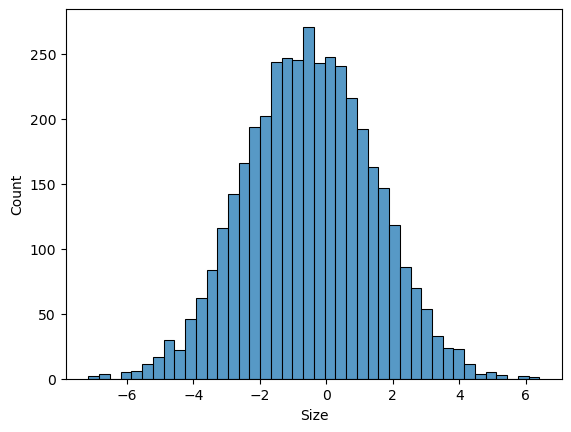

<Figure size 640x480 with 0 Axes>

In [21]:
sns.histplot(x="Size", data=apple_quality)
plt.show()
plt.clf()

#### Comparing Size vs Sweetness
As It can be seen in the scatter plot bellow, the smaller the size, the sweeter the apple. 

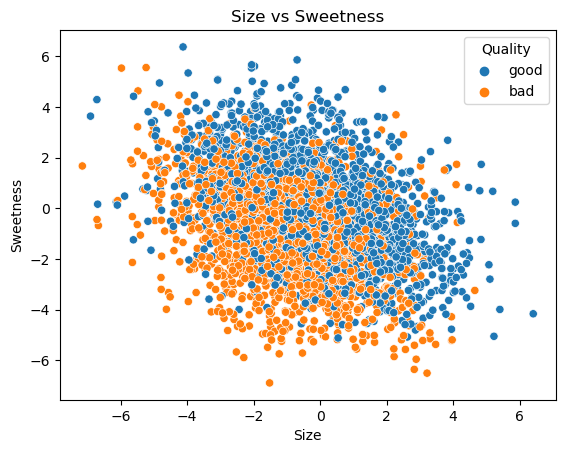

<Figure size 640x480 with 0 Axes>

In [41]:
sns.scatterplot(x="Size", y="Sweetness", data=apple_quality, hue="Quality")
plt.title("Size vs Sweetness")
plt.show()
plt.clf()

#### Calculate the linear regression

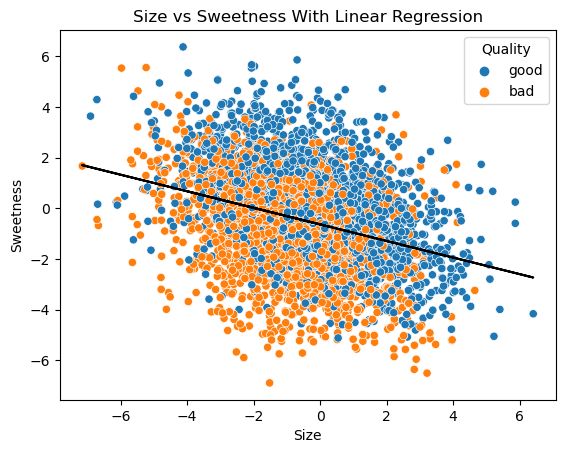

<Figure size 640x480 with 0 Axes>

In [48]:
model = sm.OLS.from_formula('Sweetness ~ Size', apple_quality)
results = model.fit()

sns.scatterplot(x="Size", y="Sweetness", data=apple_quality, hue="Quality")
plt.plot(apple_quality.Size, results.params[0] + results.params[1]*apple_quality.Size, color='black')
plt.title("Size vs Sweetness With Linear Regression")
plt.show()
plt.clf()

#### Comparing Size vs Crunchiness

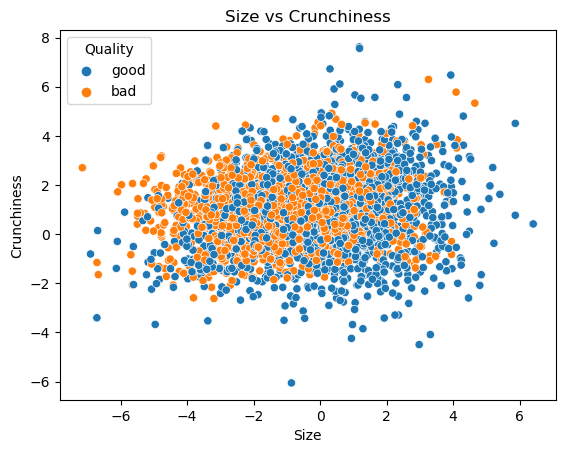

<Figure size 640x480 with 0 Axes>

In [38]:
sns.scatterplot(x="Size", y="Crunchiness", data=apple_quality, hue="Quality")
plt.title("Size vs Crunchiness")
plt.show()
plt.clf()

#### Comparing Size vs Juiciness

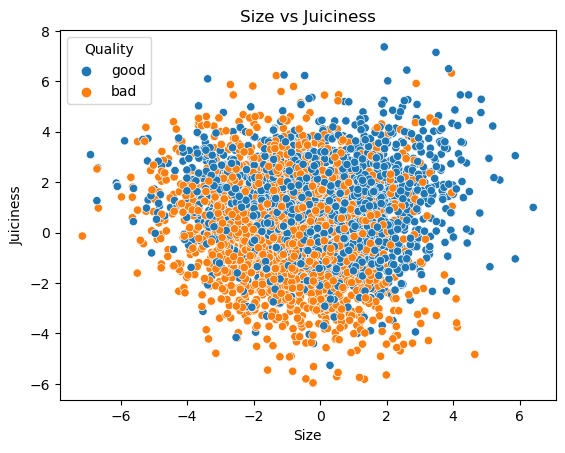

<Figure size 640x480 with 0 Axes>

In [47]:
sns.scatterplot(x="Size", y="Juiciness", data=apple_quality, hue="Quality")
plt.title("Size vs Juiciness")
plt.show()
plt.clf()

In [ ]:
#### Comparing Size vs Ripeness

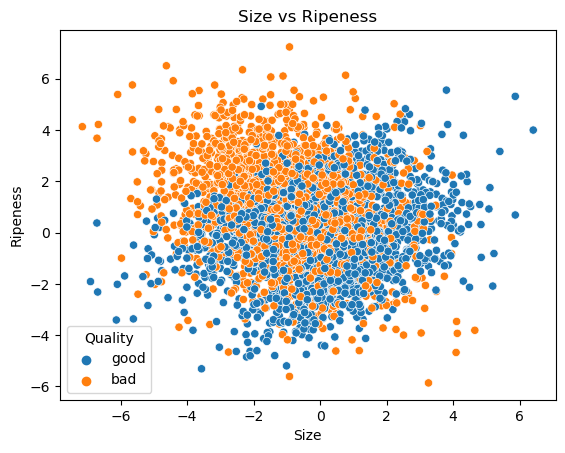

<Figure size 640x480 with 0 Axes>

In [49]:
sns.scatterplot(x="Size", y="Ripeness", data=apple_quality, hue="Quality")
plt.title("Size vs Ripeness")
plt.show()
plt.clf()

#### Heatmap of the correlation of all the properties

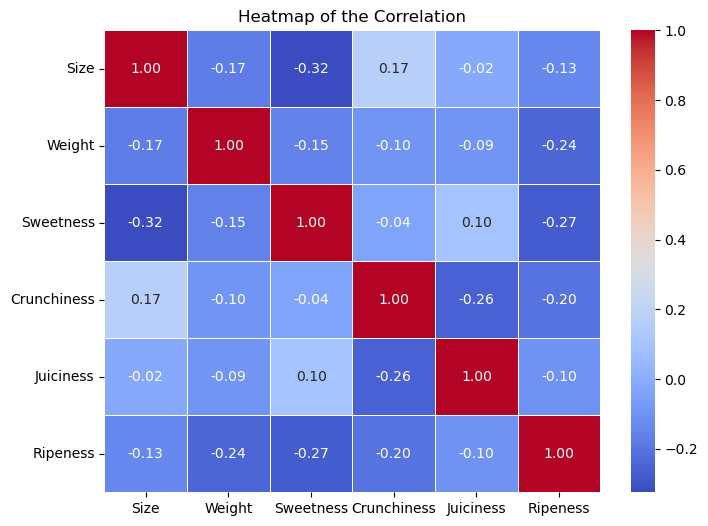

In [55]:
realtion=apple_quality.iloc[:,[0,1,2,3,4,5]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(realtion ,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of the Correlation')
plt.show()

## Conclusion
The only correlation observed with the scatteplot using the property `Size` was the `Sweetness`.\
In the future it could be worth checking other correlations with the information obtained from the **Heatmap**.